# Regresión polinómica


# Importar las librerías


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Importamos de la librería sklearn, la función train_test_split
from sklearn.model_selection import train_test_split

# Importar el data set


In [7]:
dataset = pd.read_csv('../data/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
# Variable que utilizaremos para predecir la variable objetivo
X = dataset.iloc[:, 1].values.reshape(-1, 1)
# Variable objetivo
y = dataset.iloc[:, 2].values

In [9]:
# Devidimos el dataset en train y test, dejando en test un tercio de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 1) (4, 1) (6,) (4,)


# Ajustar la regresión lineal con el dataset

In [11]:
def polynomial_regresion(X_test, X_train, degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    y_train_predict = poly_model.predict(X_train_poly)
    r2 = r2_score(y_train, y_train_predict)

    print("R2 train: {}".format(r2))

    y_test_predict = poly_model.predict(poly_features.transform(X_test))
    r2 = r2_score(y_test, y_test_predict)

    print("R2 test: {}".format(r2))
    return y_train_predict, y_test_predict

In [12]:
y_train_pred, y_test_pred = polynomial_regresion(X_test, X_train, 4)

R2 train: 0.999095579634423
R2 test: 0.8213334212487498


# Visualización de los resultados del Modelo Lineal Polinómico

### Train

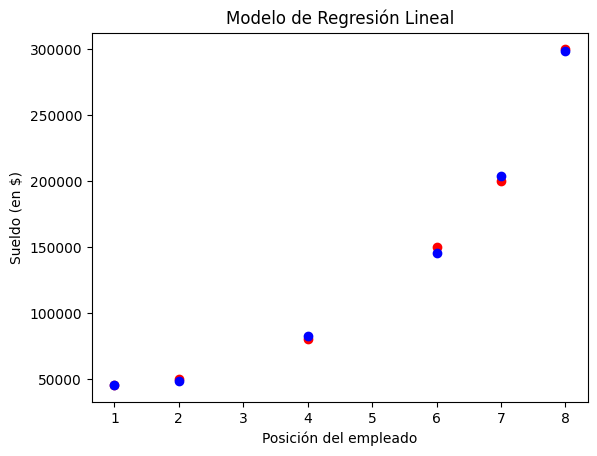

In [13]:
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, y_train_pred, color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

### Test

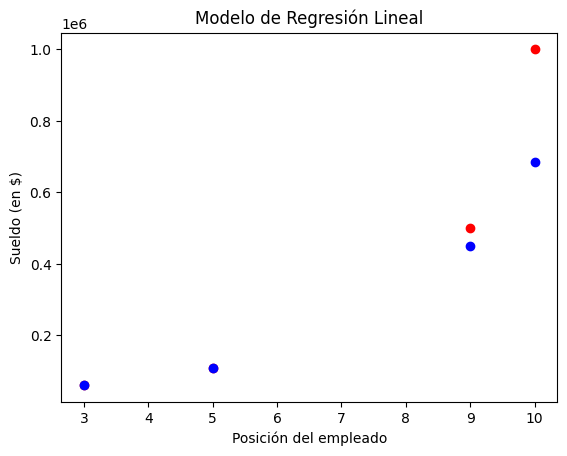

In [14]:
plt.scatter(X_test, y_test, color = "red")
plt.scatter(X_test, y_test_pred, color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()